 ## <font color=brown>Assignment Statement</font>

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company is looking at prospective properties to buy to enter the market.

### The company wants to know the following things about the prospective properties:

* Which variables are significant in predicting the price of a house, and

* How well those variables describe the price of a house.

### <font color=brown>Business Goal</font>
We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables.

In [289]:
# Import libraries

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import datetime

sns.set()
%config InlineBackend.figure_format="retina"

#  Supressing warnings 

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

# Data display coustomization
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### <font color=brown>Understanding Data</font> 

In [290]:
# Read the dataset

housingdf = pd.read_csv(r'D:\PGDDS\Machine Learning II\Module 5 - Assignment Advanced Regression\train.csv')

housingdf.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [291]:
# Check the shape of the dataset 

housingdf.shape

(1460, 81)

In [292]:
# Check the columns present in dataset

housingdf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [293]:
# Checking summary of the dataset

housingdf.describe(include = 'all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count     91     1460        1460      1460      1460      1460         1460   
unique     2        4           4         2         5         3           25   
top     Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq      50      925        1311      1459      1052      1382          225   
mean     NaN      NaN         NaN       NaN       NaN       NaN          NaN   
std      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
min      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
25%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
50%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
75%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
max      NaN      NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460  1460.000000  1460.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.099315     5.575342   
std           NaN        NaN      NaN        NaN     1.382997     1.112799   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1460.000000   1460.000000      1460     1460        1460        1460   
unique          NaN           NaN         6        8          15          16   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN      1141     1434         515         504   
mean    1971.267808   1984.865753       NaN      NaN         NaN         NaN   
std       30.202904     20.645407       NaN      NaN         NaN         NaN   
min     1872.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1967.000000       NaN      NaN         NaN         NaN   
50%     1973.000000   1994.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1452  1452.000000      1460      1460       1460     1423   
unique          4          NaN         4         

In [294]:
# Checking data types of feature variables and null values present in each column 

housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### <font color=brown> Data Cleaning and Preparation </font>

In [295]:
# Removing duplicate rows
housingdf.drop_duplicates(subset='Id')
housingdf.shape

(1460, 81)

In [296]:
# Checking the number of missing values in each column 

housingdf.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

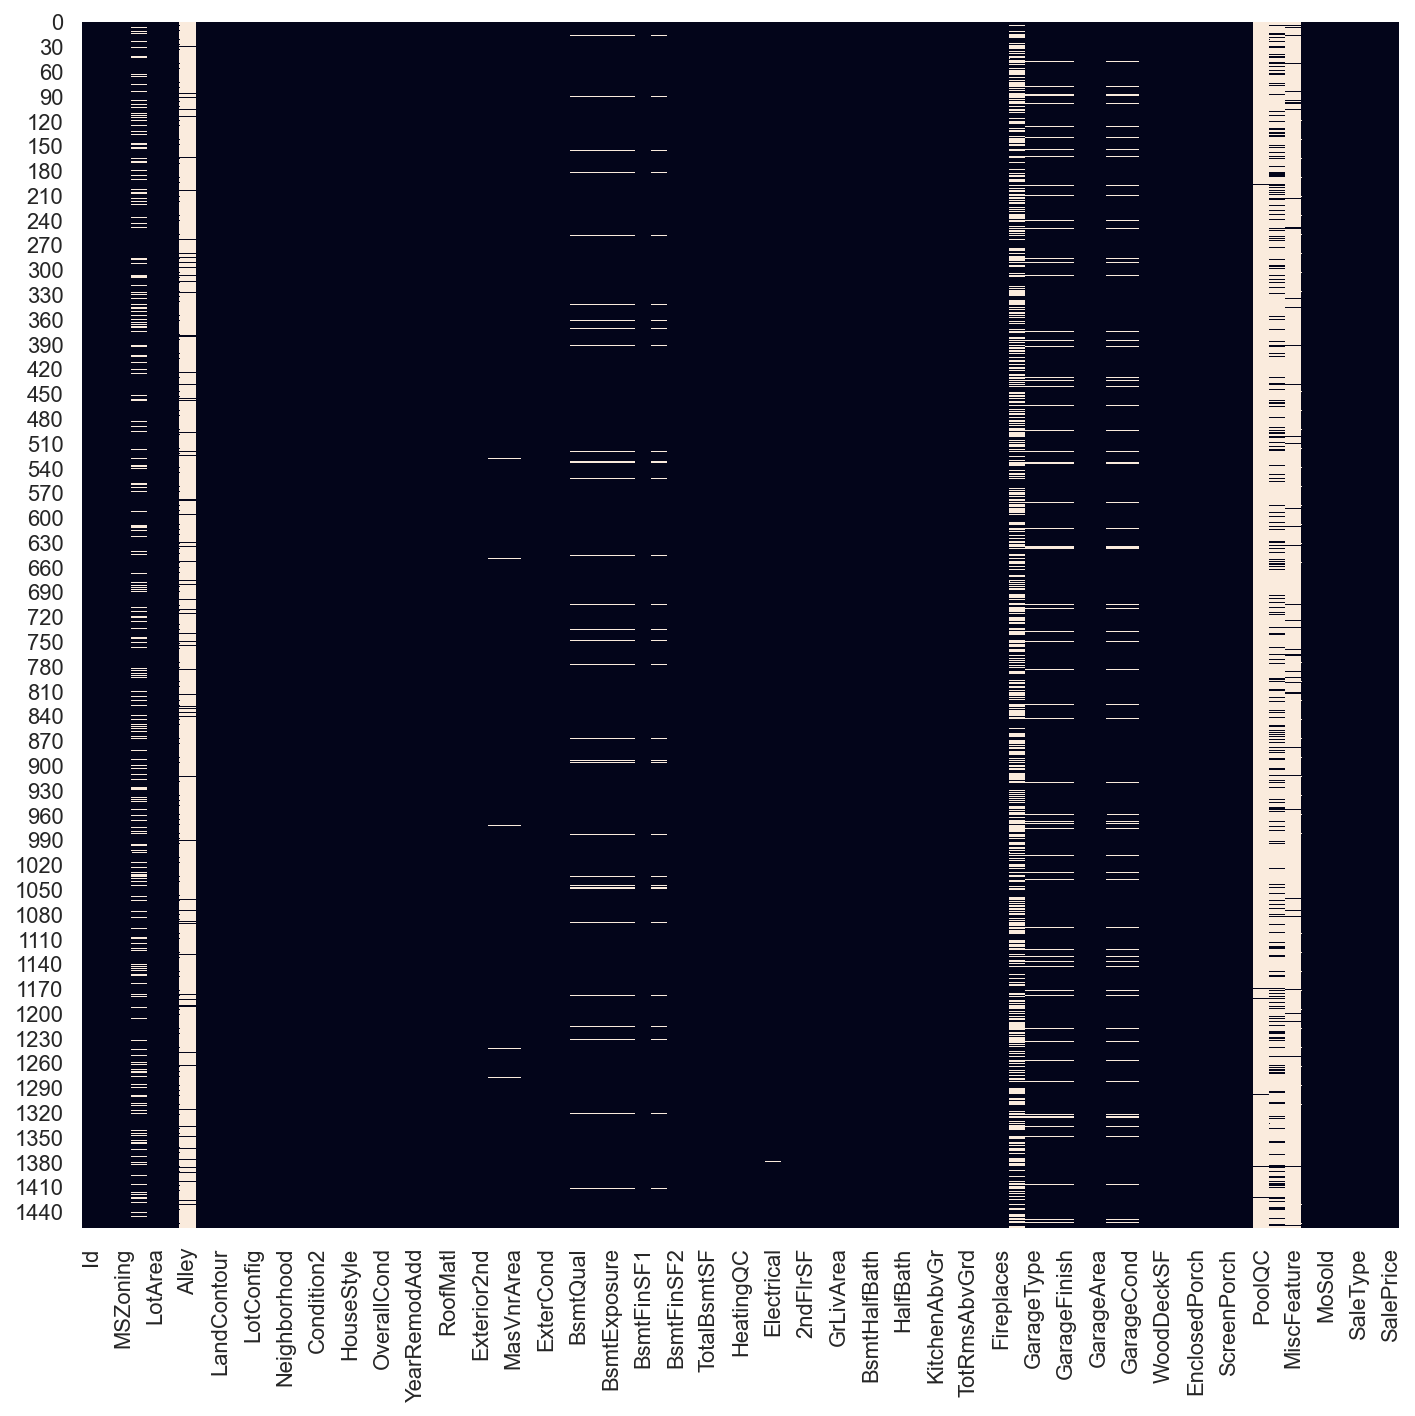

In [297]:
# Visualising occurances of missing values in each columns 

plt.figure(figsize=(10,10))
sns.heatmap(housingdf.isnull(), cbar=False)

plt.tight_layout()
plt.show()

In [298]:
# Checking the percentage of number of missing values in each column 

null_percent = round(100*(housingdf.isnull().sum()/len(housingdf)),2)
null_percent

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

### <font color=brown>Observation:</font>
    
* There are high number of missing values in some columns
* Lets drop all the columns having missing values greater than 40% missing values

In [299]:
# Dropping columns with null_percent > 40%

for col in housingdf.columns:
    if null_percent[col] > 40.00:
        housingdf.drop(col, 1, inplace = True)

In [300]:
# Checking shape of leads dataframe after removing columns with with null values > 3000
housingdf.shape

(1460, 76)

In [301]:
# Dropping Id column

housingdf.drop('Id', axis=1, inplace=True)
housingdf.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd          

In [302]:
# Numerical columns

num_col = housingdf.select_dtypes(include=['int64','float64'])
num_col.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [303]:
# Create new column Ageofhouse, Ageofremodel, AgeofGarageblt, AgesinceYrSold to find the age of house by subtratcing the year built from current year i.e 2021.

housingdf['Ageofhouse'] = 2021-housingdf['YearBuilt']
housingdf['Ageofremodel'] = 2021-housingdf['YearRemodAdd']
housingdf['AgeofGarageblt'] = 2021-housingdf['GarageYrBlt']
housingdf['AgesinceYrSold'] = 2021-housingdf['YrSold']
housingdf.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd          

In [304]:
# Drop 'YearBuilt' column

housingdf.drop(['YearBuilt'], axis=1, inplace=True)
housingdf.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle RoofMatl  \
0     2Story            7            5          2003     Gable  CompShg   
1     1Story            6            8          1976     Gable  CompShg   
2     2Story            7            5          2002     Gable  CompShg   
3     2Story            7            5          1970     Gable  CompShg   
4     2Story            8            5          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd             7        Typ           1     Detchd       1998.0   
4          

In [305]:
# Dropping date and year columns

housingdf.drop(['YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis=1,inplace=True)
housingdf.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story            7            5     Gable  CompShg     VinylSd   
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        150          856    GasA        Ex          Y      SBrkr       856   
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1          Gd             8        Typ   
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   

   Fireplaces GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
0           0     Attchd          RFn           2         548         TA   
1           1     Attchd          RFn           2         460         TA   
2           1     Attchd          R

In [306]:
# Numerical columns

num_col = housingdf.select_dtypes(include=['int64','float64'])
num_col.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'SalePrice', 'Ageofhouse', 'Ageofremodel',
       'AgeofGarageblt', 'AgesinceYrSold'],
      dtype='object')

In [307]:
# Impute missing values in Numeric values with mean

housingdf['LotFrontage']=housingdf['LotFrontage'].fillna(housingdf['LotFrontage'].mean())
housingdf['MasVnrArea']=housingdf['MasVnrArea'].fillna(housingdf['MasVnrArea'].mean())

In [308]:
# Categorical columns

cat_col = housingdf.select_dtypes(include=['object'])
cat_col.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [309]:
# Replace missing values with No variable respectively

housingdf['BsmtCond'].fillna('NoBasement', inplace=True)
housingdf['BsmtQual'].fillna('NoBasement', inplace=True)
housingdf['BsmtExposure'].fillna('NoBasement', inplace=True)
housingdf['BsmtFinType1'].fillna('NoBasement', inplace=True)
housingdf['BsmtFinType2'].fillna('NoBasement', inplace=True)
housingdf['GarageType'].fillna('NoGarage', inplace=True)
housingdf['GarageFinish'].fillna('NoGarage', inplace=True)
housingdf['GarageQual'].fillna('NoGarage', inplace=True)
housingdf['GarageCond'].fillna('NoGarage', inplace=True)

In [310]:
# Identify the skewed categorical columns

for col in cat_col:
    print(housingdf[col].value_counts(normalize=True))
    print ('----------------------------------------------------------------------')

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
----------------------------------------------------------------------
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
----------------------------------------------------------------------
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
----------------------------------------------------------------------
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
----------------------------------------------------------------------
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
----------------------------------------------------------------------
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
----------------------------------------------------------

In [311]:
# Drop categorical columns with high skewness

housingdf.drop(['Street','LandContour','Utilities','LandSlope','Condition2','RoofMatl','ExterCond','BsmtCond','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive'], axis=1,inplace=True)
housingdf.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  Condition1 BldgType HouseStyle  OverallQual  OverallCond RoofStyle  \
0       Norm     1Fam     2Story            7            5     Gable   
1      Feedr     1Fam     1Story            6            8     Gable   
2       Norm     1Fam     2Story            7            5     Gable   
3       Norm     1Fam     2Story            7            5     Gable   
4       Norm     1Fam     2Story            8            5     Gable   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd      PConc   
1     MetalSd     MetalSd       None         0.0        TA     CBlock   
2     VinylSd     VinylSd    BrkFace       162.0        Gd      PConc   
3     Wd Sdng     Wd Shng       None         0.0        TA     BrkTil   
4     VinylSd     VinylSd    BrkFace       350.0        Gd      PConc   

  BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       Gd           No          GLQ         706          Unf           0   
1       Gd           Gd          ALQ         978          Unf           0   
2       Gd           Mn          GLQ         486          Unf           0   
3       TA           No          ALQ         216          Unf           0   
4       Gd           Av          GLQ         655          Unf           0   

   BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        150          856        Ex       856       854             0   
1        284         1262        Ex      1262         0             0   
2        434          920        Ex       920       866             0   
3        540          756        Gd       961       756             0   
4        490         1145        Ex      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces GarageType GarageFinish  \
0             1          Gd             8           0     Attchd          RFn   
1             1          TA             6           1     Attchd          RFn   
2             1          Gd             6           1     Attchd          RFn   
3             1          Gd             7           1     Detchd          Unf   
4             1          Gd             9           1     Attchd          RFn   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           2         548           0           61              0          0   
1           2         460         298            0              0          0   
2           2         608           0           42              0          0   
3           3         642           0           35            272          0   
4           3         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold SaleType SaleCondition  SalePrice  \
0            0         0        0       2       WD        Normal     208500   
1            0         0        0       5       WD        Normal     181500   
2            0         0        0       9       WD        Normal     22350

In [312]:
# Checking the percentage of number of missing values in each column 

null_percent = round(100*(housingdf.isnull().sum()/len(housingdf)),2)
null_percent

MSSubClass        0.00
MSZoning          0.00
LotFrontage       0.00
LotArea           0.00
LotShape          0.00
LotConfig         0.00
Neighborhood      0.00
Condition1        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
RoofStyle         0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.00
ExterQual         0.00
Foundation        0.00
BsmtQual          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
HeatingQC         0.00
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea         0.00
BsmtFullBath      0.00
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Fireplaces        0.00
GarageType        0.00
GarageFinish      0.00
GarageCars 

In [313]:
# Impute missing values in Categorical values with mode

housingdf['MasVnrType']=housingdf['MasVnrType'].fillna(housingdf['MasVnrType'].mode()[0])


In [314]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1460 non-null   int64  
 1   MSZoning        1460 non-null   object 
 2   LotFrontage     1460 non-null   float64
 3   LotArea         1460 non-null   int64  
 4   LotShape        1460 non-null   object 
 5   LotConfig       1460 non-null   object 
 6   Neighborhood    1460 non-null   object 
 7   Condition1      1460 non-null   object 
 8   BldgType        1460 non-null   object 
 9   HouseStyle      1460 non-null   object 
 10  OverallQual     1460 non-null   int64  
 11  OverallCond     1460 non-null   int64  
 12  RoofStyle       1460 non-null   object 
 13  Exterior1st     1460 non-null   object 
 14  Exterior2nd     1460 non-null   object 
 15  MasVnrType      1460 non-null   object 
 16  MasVnrArea      1460 non-null   float64
 17  ExterQual       1460 non-null   o

In [315]:
# Imputing null values of GarageYrBlt_Old column 

housingdf.AgeofGarageblt.fillna(0,inplace=True)

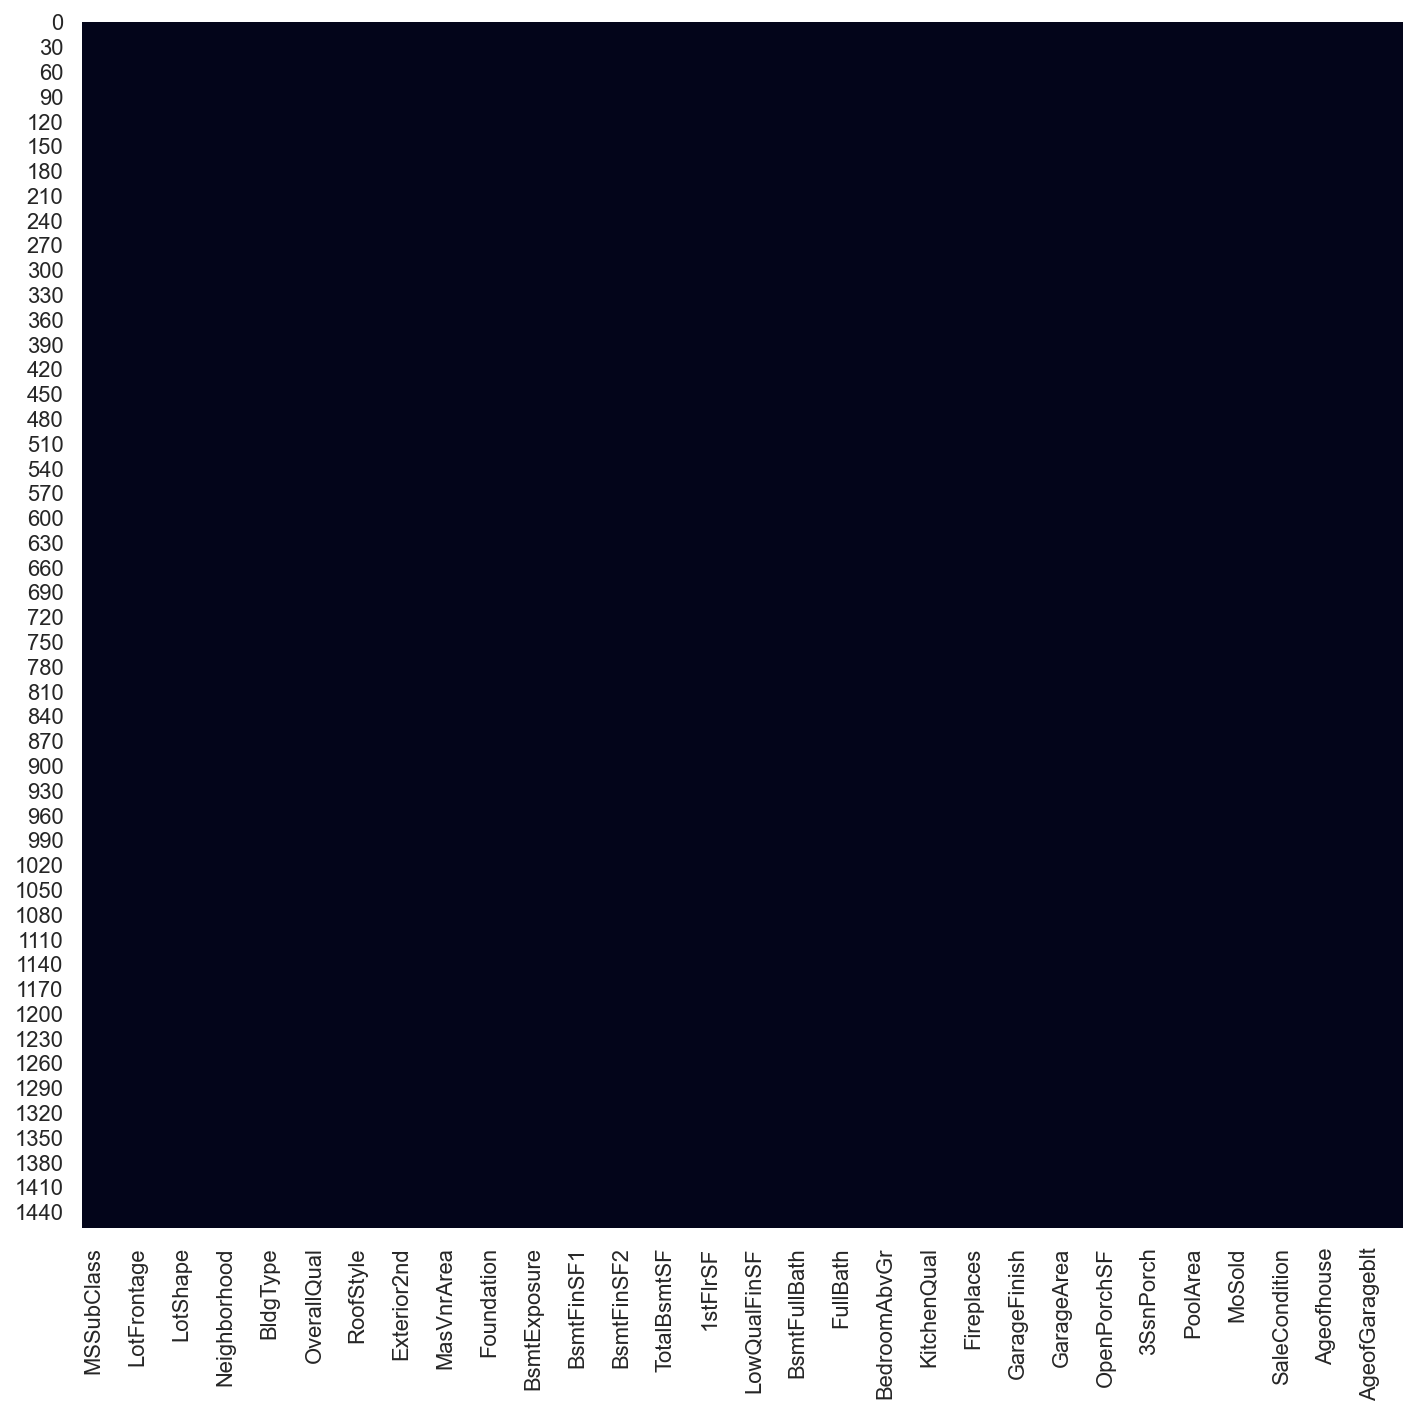

In [316]:
# Visualising occurances of missing values in each columns 

plt.figure(figsize=(10,10))
sns.heatmap(housingdf.isnull(), cbar=False)

plt.tight_layout()
plt.show()

In [317]:
housingdf.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  Condition1 BldgType HouseStyle  OverallQual  OverallCond RoofStyle  \
0       Norm     1Fam     2Story            7            5     Gable   
1      Feedr     1Fam     1Story            6            8     Gable   
2       Norm     1Fam     2Story            7            5     Gable   
3       Norm     1Fam     2Story            7            5     Gable   
4       Norm     1Fam     2Story            8            5     Gable   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd      PConc   
1     MetalSd     MetalSd       None         0.0        TA     CBlock   
2     VinylSd     VinylSd    BrkFace       162.0        Gd      PConc   
3     Wd Sdng     Wd Shng       None         0.0        TA     BrkTil   
4     VinylSd     VinylSd    BrkFace       350.0        Gd      PConc   

  BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       Gd           No          GLQ         706          Unf           0   
1       Gd           Gd          ALQ         978          Unf           0   
2       Gd           Mn          GLQ         486          Unf           0   
3       TA           No          ALQ         216          Unf           0   
4       Gd           Av          GLQ         655          Unf           0   

   BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        150          856        Ex       856       854             0   
1        284         1262        Ex      1262         0             0   
2        434          920        Ex       920       866             0   
3        540          756        Gd       961       756             0   
4        490         1145        Ex      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces GarageType GarageFinish  \
0             1          Gd             8           0     Attchd          RFn   
1             1          TA             6           1     Attchd          RFn   
2             1          Gd             6           1     Attchd          RFn   
3             1          Gd             7           1     Detchd          Unf   
4             1          Gd             9           1     Attchd          RFn   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           2         548           0           61              0          0   
1           2         460         298            0              0          0   
2           2         608           0           42              0          0   
3           3         642           0           35            272          0   
4           3         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold SaleType SaleCondition  SalePrice  \
0            0         0        0       2       WD        Normal     208500   
1            0         0        0       5       WD        Normal     181500   
2            0         0        0       9       WD        Normal     22350

### <font color=brown> Data Visualisation </font>

In [318]:
# correlation matrix

cor = housingdf.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass        1.000000    -0.357056 -0.139781     0.032628    -0.059316   
LotFrontage      -0.357056     1.000000  0.306795     0.234196    -0.052820   
LotArea          -0.139781     0.306795  1.000000     0.105806    -0.005636   
OverallQual       0.032628     0.234196  0.105806     1.000000    -0.091932   
OverallCond      -0.059316    -0.052820 -0.005636    -0.091932     1.000000   
MasVnrArea        0.022895     0.179283  0.103960     0.410238    -0.127788   
BsmtFinSF1       -0.069836     0.215828  0.214103     0.239666    -0.046231   
BsmtFinSF2       -0.065649     0.043340  0.111170    -0.059119     0.040229   
BsmtUnfSF        -0.140759     0.122156 -0.002618     0.308159    -0.136841   
TotalBsmtSF      -0.238518     0.363358  0.260833     0.537808    -0.171098   
1stFlrSF         -0.251758     0.414266  0.299475     0.476224    -0.144203   
2ndFlrSF          0.307886     0.072483  0.050986     0.295493     0.028942   
LowQualFinSF      0.046474     0.036849  0.004779    -0.030429     0.025494   
GrLivArea         0.074853     0.368392  0.263116     0.593007    -0.079686   
BsmtFullBath      0.003491     0.091481  0.158155     0.111098    -0.054942   
BsmtHalfBath     -0.002333    -0.006419  0.048046    -0.040150     0.117821   
FullBath          0.131608     0.180424  0.126031     0.550600    -0.194149   
HalfBath          0.177354     0.048258  0.014259     0.273458    -0.060769   
BedroomAbvGr     -0.023438     0.237023  0.119690     0.101676     0.012980   
KitchenAbvGr      0.281721    -0.005805 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd      0.040380     0.320146  0.190015     0.427452    -0.057583   
Fireplaces       -0.045569     0.235755  0.271364     0.396765    -0.023820   
GarageCars       -0.040110     0.269729  0.154871     0.600671    -0.185758   
GarageArea       -0.098672     0.323663  0.180403     0.562022    -0.151521   
WoodDeckSF       -0.012579     0.077106  0.171698     0.238923    -0.003334   
OpenPorchSF      -0.006100     0.137454  0.084774     0.308819    -0.032589   
EnclosedPorch    -0.012037     0.009790 -0.018340    -0.113937     0.070356   
3SsnPorch        -0.043825     0.062335  0.020423     0.030371     0.025504   
ScreenPorch      -0.026030     0.037684  0.043160     0.064886     0.054811   
PoolArea          0.008283     0.180868  0.077672     0.065166    -0.001985   
MiscVal          -0.007683     0.001168  0.038068    -0.031406     0.068777   
MoSold           -0.013585     0.010158  0.001205     0.070815    -0.003511   
SalePrice        -0.084284     0.334901  0.263843     0.790982    -0.077856   
Ageofhouse       -0.027850    -0.117598 -0.014228    -0.572323     0.375983   
Ageofremodel     -0.040581    -0.082746 -0.013788    -0.550684    -0.073741   
AgeofGarageblt   -0.106388    -0.023158  0.050809    -0.381595     0.287367   
AgesinceYrSold    0.021407    -0.006768  0.014261     0.027347    -0.043950   

                MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
MSSubClass        0.022895   -0.069836   -0.065649  -0.140759    -0.238518   
LotFrontage       0.179283    0.215828    0.043340   0.122156     0.363358   
LotArea           0.103960    0.214103    0.111170  -0.002618     0.260833   
OverallQual       0.410238    0.239666   -0.059119   0.308159     0.537808   
OverallCond      -0.127788   -0.046231    0.040229  -0.136841    -0.171098   
MasVnrArea        1.000000    0.263582   -0.072302   0.114184     0.362452   
BsmtFinSF1        0.263582    1.000000   -0.050117  -0.495251     0.522396   
BsmtFinSF2       -0.072302   -0.050117    1.000000  -0.209294     0.104810   
BsmtUnfSF         0.114184   -0.495251   -0.209294   1.000000     0.415360   
TotalBsmtSF       0.362452    0.522396    0.104810   0.415360     1.000000   
1stFlrSF          0.342160    0.445863    0.097117   0.317987     0.819530   
2ndFlrSF          0.174019   -0.137079   -0.099260   0.004469    -0.174512   

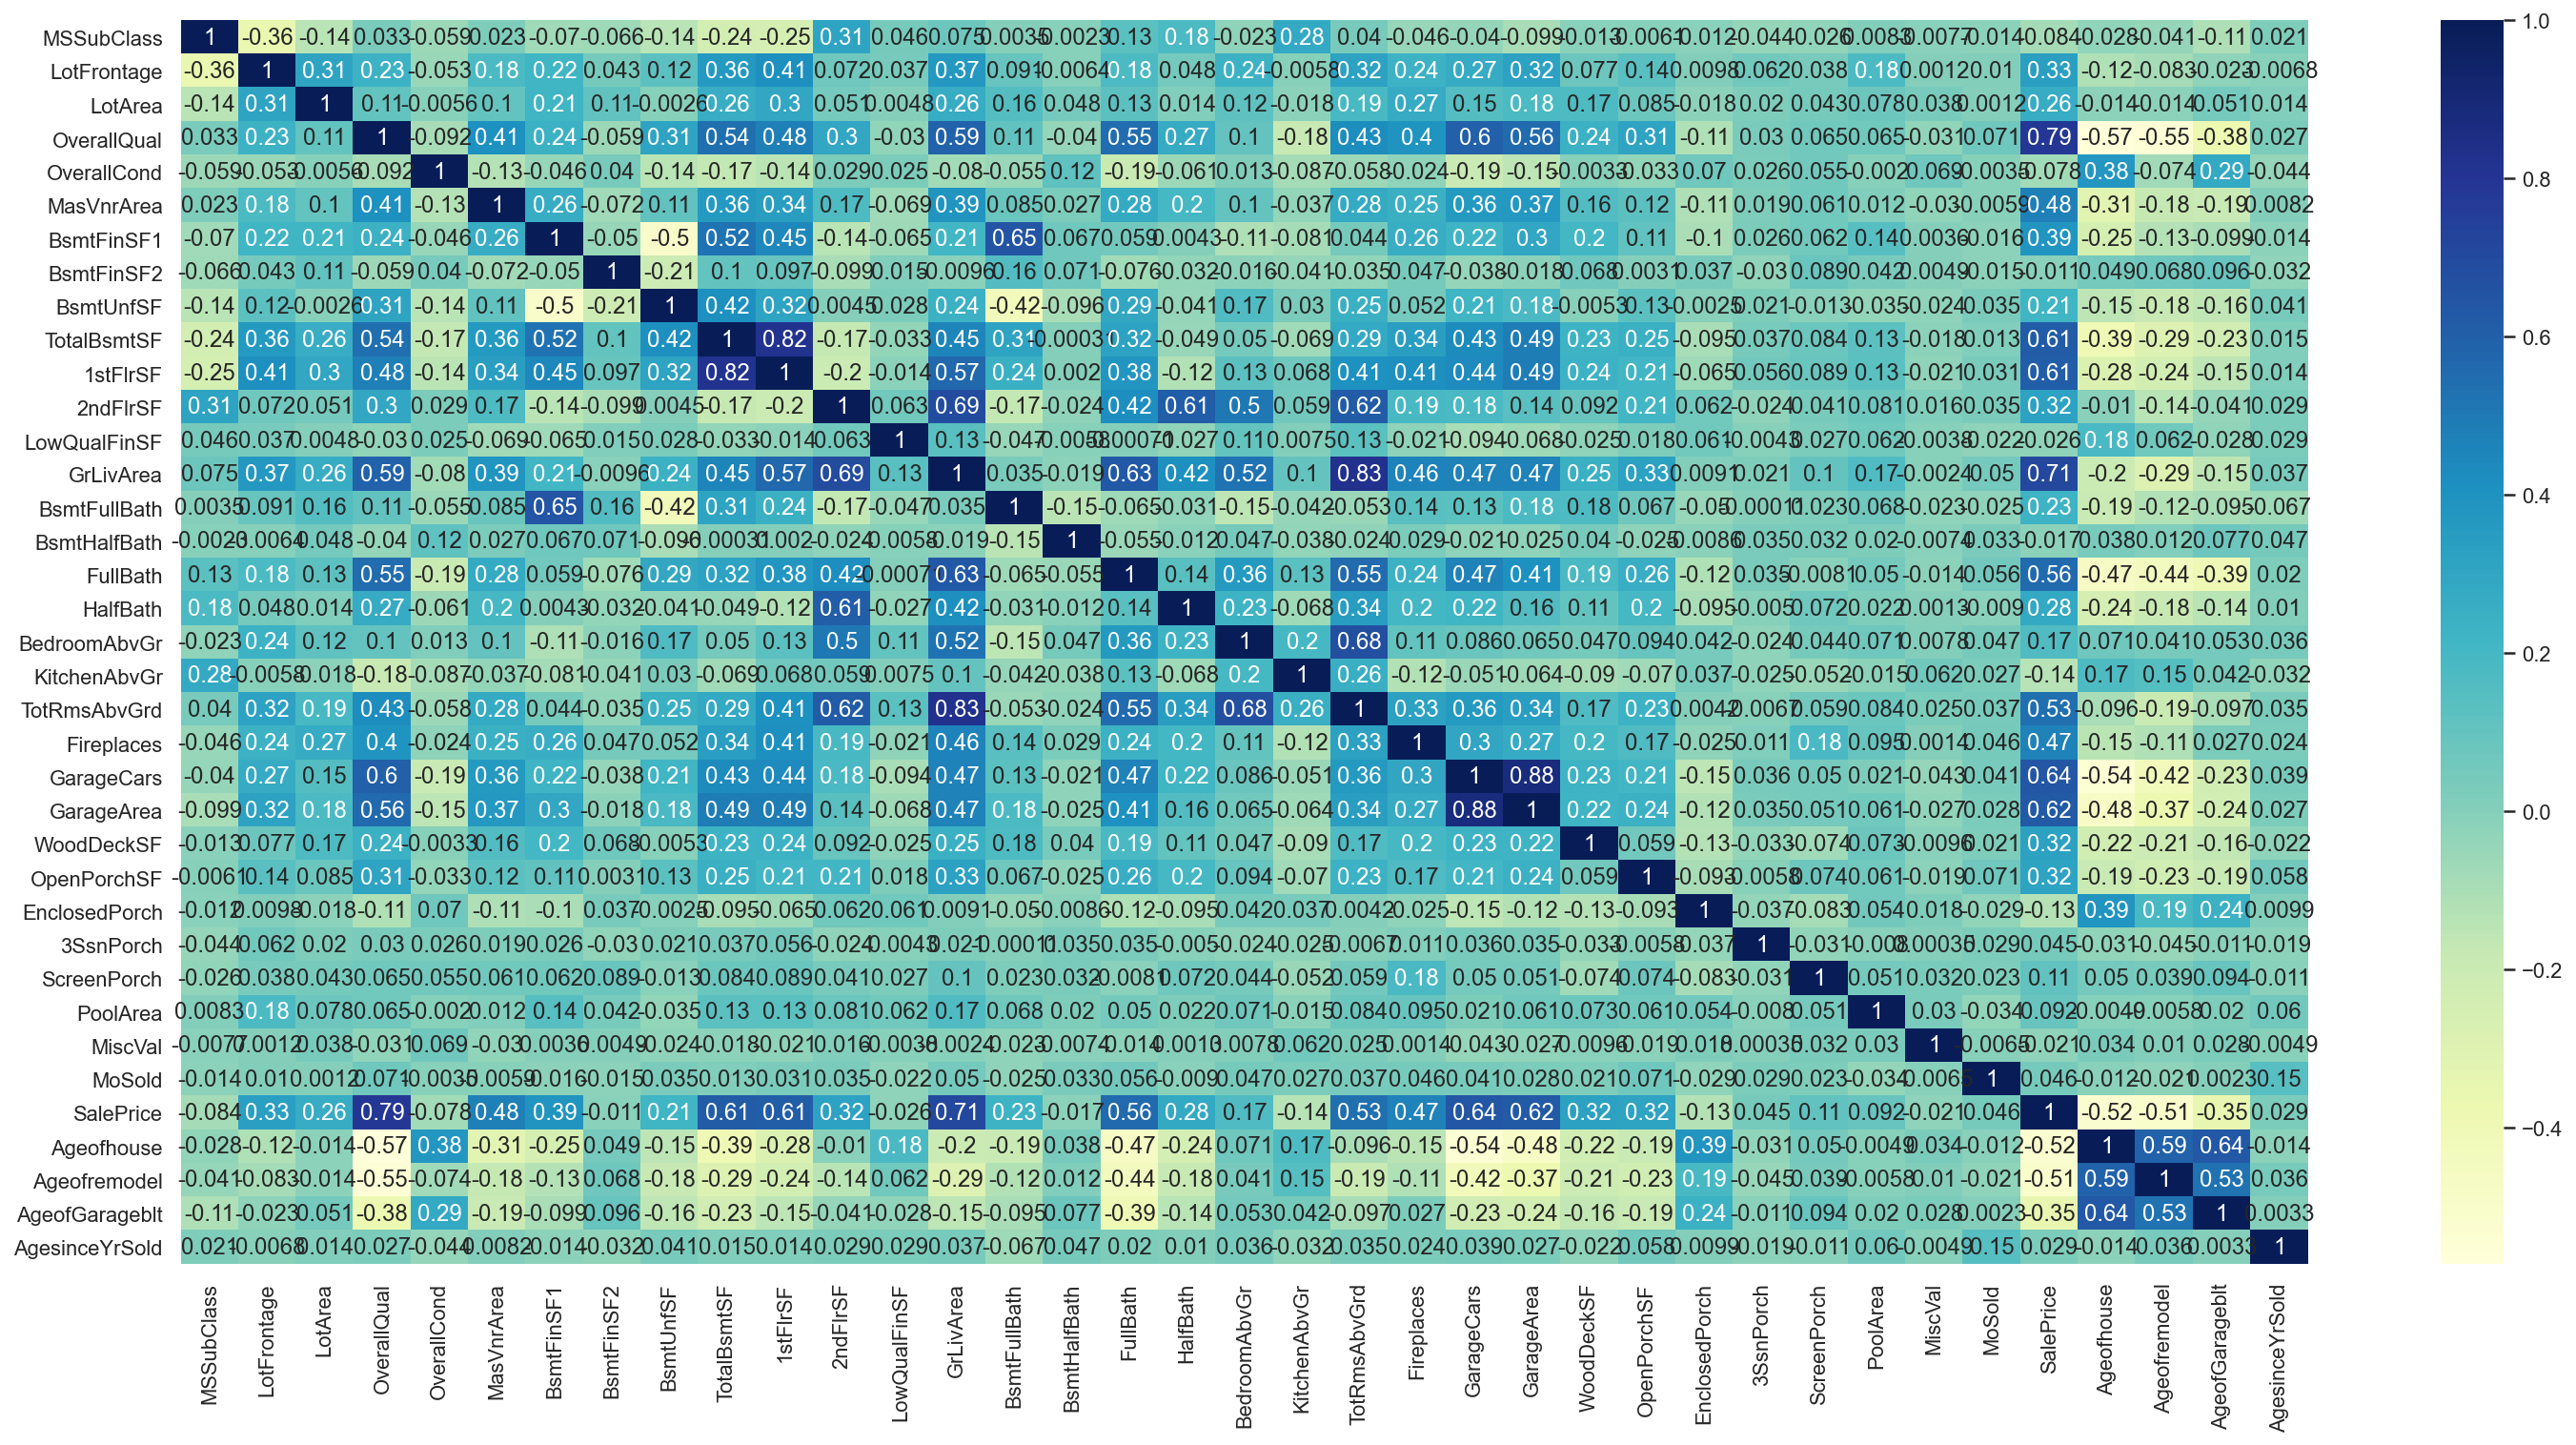

In [319]:
# Visualizing correlation by heatmap

plt.figure(figsize=(25, 12))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [320]:
# Observing pairs with high correlation

housingdf.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(20)

AgesinceYrSold  AgesinceYrSold    1.000000
GarageArea      GarageCars        0.882475
GrLivArea       TotRmsAbvGrd      0.825489
TotalBsmtSF     1stFlrSF          0.819530
OverallQual     SalePrice         0.790982
SalePrice       GrLivArea         0.708624
2ndFlrSF        GrLivArea         0.687501
TotRmsAbvGrd    BedroomAbvGr      0.676620
BsmtFullBath    BsmtFinSF1        0.649212
GarageCars      SalePrice         0.640409
Ageofhouse      AgeofGarageblt    0.636498
FullBath        GrLivArea         0.630012
GarageArea      SalePrice         0.623431
2ndFlrSF        TotRmsAbvGrd      0.616423
SalePrice       TotalBsmtSF       0.613581
2ndFlrSF        HalfBath          0.609707
SalePrice       1stFlrSF          0.605852
GarageCars      OverallQual       0.600671
GrLivArea       OverallQual       0.593007
Ageofremodel    Ageofhouse        0.592855
dtype: float64

In [321]:
# We drop variables having corrlinearity > 80%. We drop GarageArea, TotRmsAbvGrd, TotalBsmtSF

housingdf.drop(['GarageArea', 'TotRmsAbvGrd', 'TotalBsmtSF'], axis=1,inplace=True)
housingdf.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  Condition1 BldgType HouseStyle  OverallQual  OverallCond RoofStyle  \
0       Norm     1Fam     2Story            7            5     Gable   
1      Feedr     1Fam     1Story            6            8     Gable   
2       Norm     1Fam     2Story            7            5     Gable   
3       Norm     1Fam     2Story            7            5     Gable   
4       Norm     1Fam     2Story            8            5     Gable   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd      PConc   
1     MetalSd     MetalSd       None         0.0        TA     CBlock   
2     VinylSd     VinylSd    BrkFace       162.0        Gd      PConc   
3     Wd Sdng     Wd Shng       None         0.0        TA     BrkTil   
4     VinylSd     VinylSd    BrkFace       350.0        Gd      PConc   

  BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       Gd           No          GLQ         706          Unf           0   
1       Gd           Gd          ALQ         978          Unf           0   
2       Gd           Mn          GLQ         486          Unf           0   
3       TA           No          ALQ         216          Unf           0   
4       Gd           Av          GLQ         655          Unf           0   

   BsmtUnfSF HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150        Ex       856       854             0       1710   
1        284        Ex      1262         0             0       1262   
2        434        Ex       920       866             0       1786   
3        540        Gd       961       756             0       1717   
4        490        Ex      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  Fireplaces GarageType GarageFinish  GarageCars  WoodDeckSF  \
0          Gd           0     Attchd          RFn           2           0   
1          TA           1     Attchd          RFn           2         298   
2          Gd           1     Attchd          RFn           2           0   
3          Gd           1     Detchd          Unf           3           0   
4          Gd           1     Attchd          RFn           3         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold SaleType SaleCondition  SalePrice  Ageofhouse  Ageofremodel  \
0       2       WD        Normal     208500          18            18   
1       5       WD        Normal     181500          45            45   
2       9       WD        Normal     223500          20            19   
3       2       WD       Abnorml     140000         106      

In [322]:
# Numerical columns

num_col = housingdf.select_dtypes(include=['int64','float64'])
num_col.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice',
       'Ageofhouse', 'Ageofremodel', 'AgeofGarageblt', 'AgesinceYrSold'],
      dtype='object')

In [323]:
num_col.shape

(1460, 34)

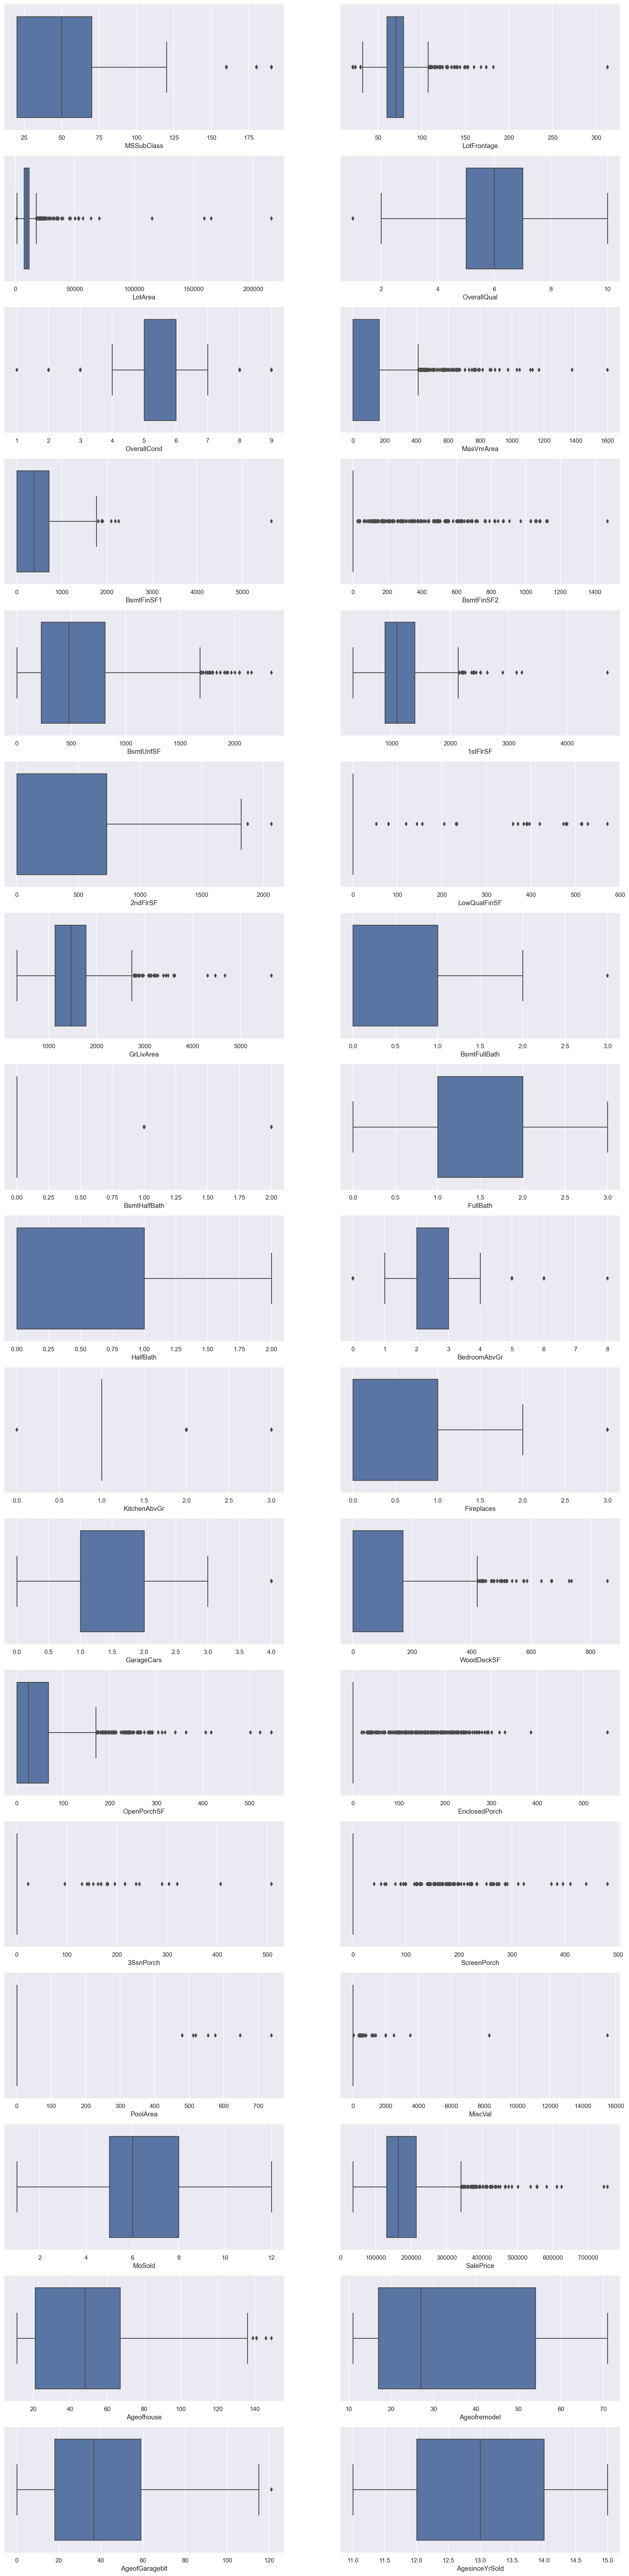

In [324]:
# Boxplot numerical data

plt.figure(figsize=(20,100))
for i in enumerate(num_col):
    plt.subplot(20,2,i[0]+1)
    sns.boxplot(housingdf[i[1]])

* We have observed some of the variables have outliers, but looking at the variables it was found that there are possibilities of such data and thus none of the data can be discarded.

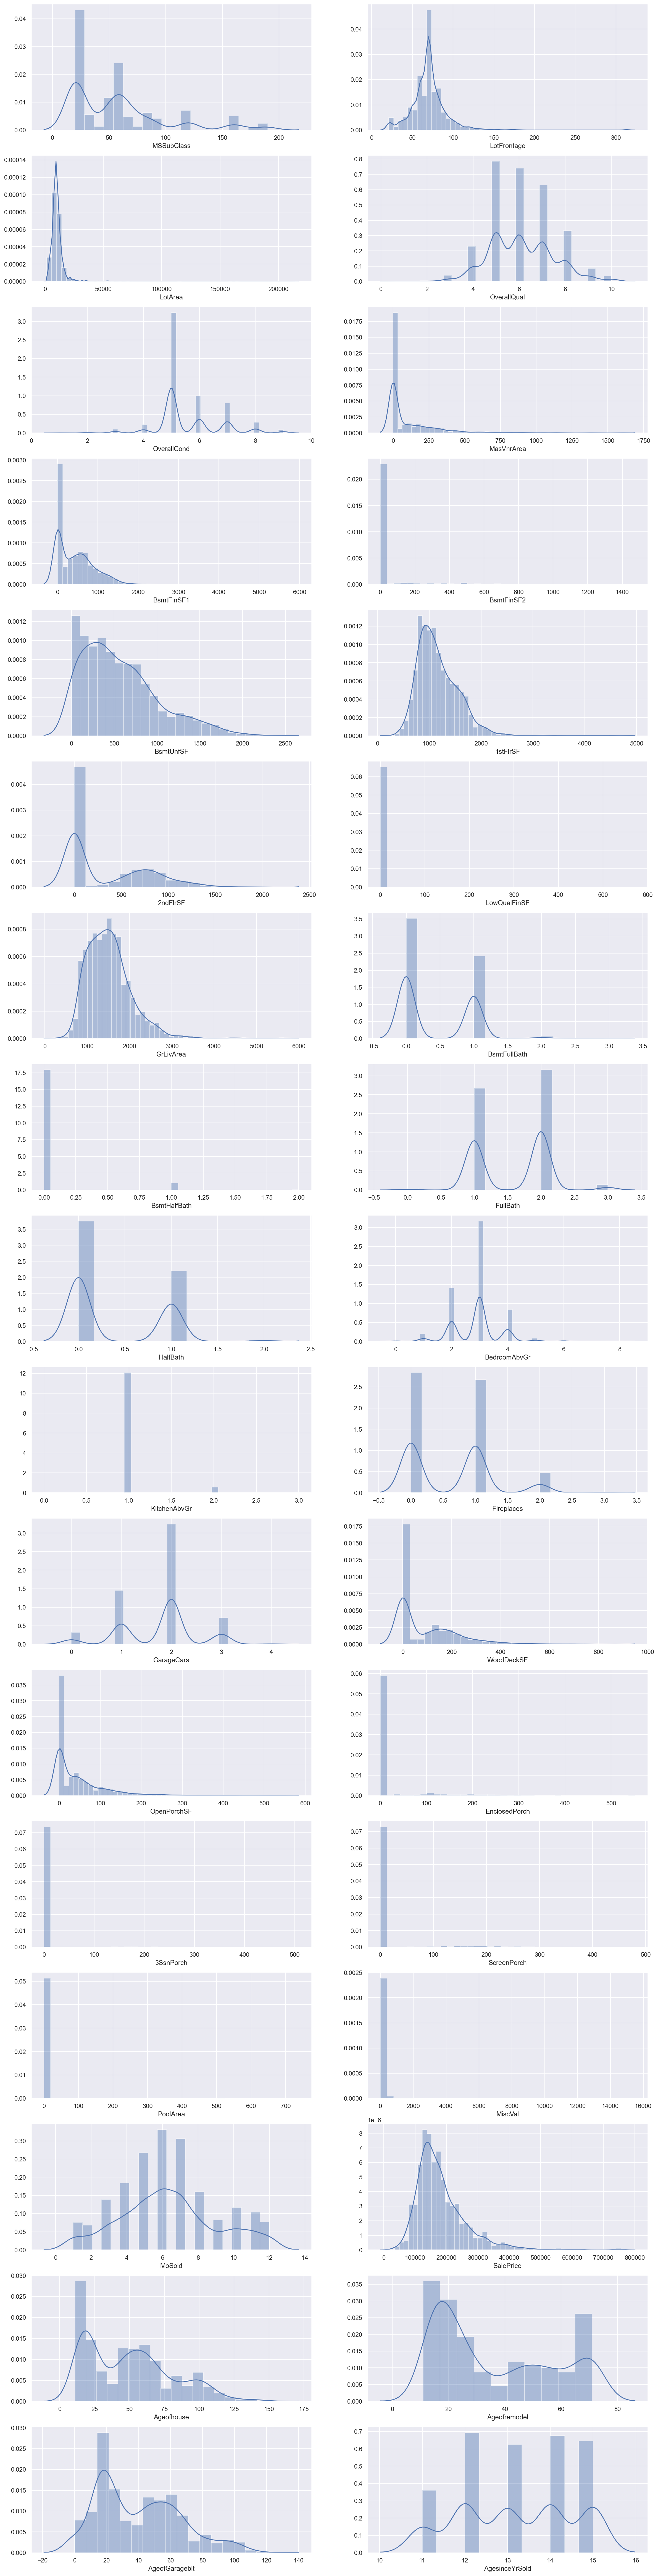

In [325]:
# distplot numerical data

plt.figure(figsize=(20,100))
for i in enumerate(num_col):
    plt.subplot(20,2,i[0]+1)
    sns.distplot(housingdf[i[1]])

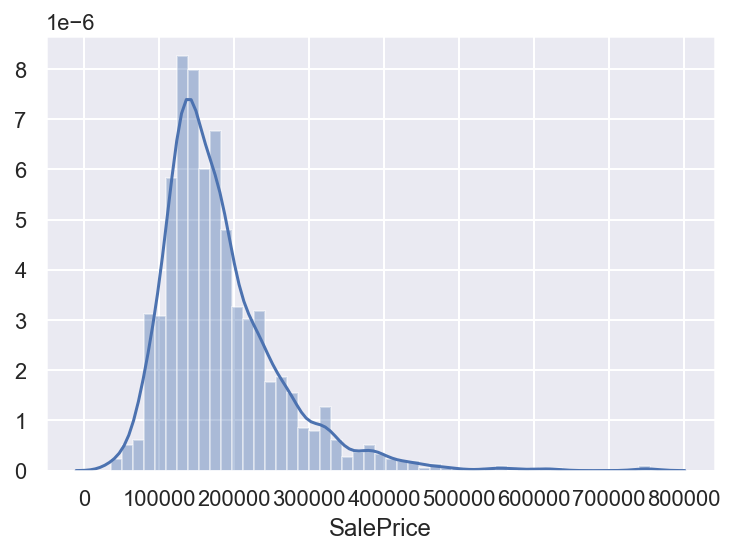

In [326]:
# SalePrice distribution

sns.distplot(housingdf.SalePrice)
plt.show()

Target and independent columns seems to be skewed and have outliers outlier treatement cannot be done as the capping or removing the outliers will restrict us in extrapolating the results or 
which will fall outside the range, therefore data transformation will be done to rectify the or to retain the normality of the columns.

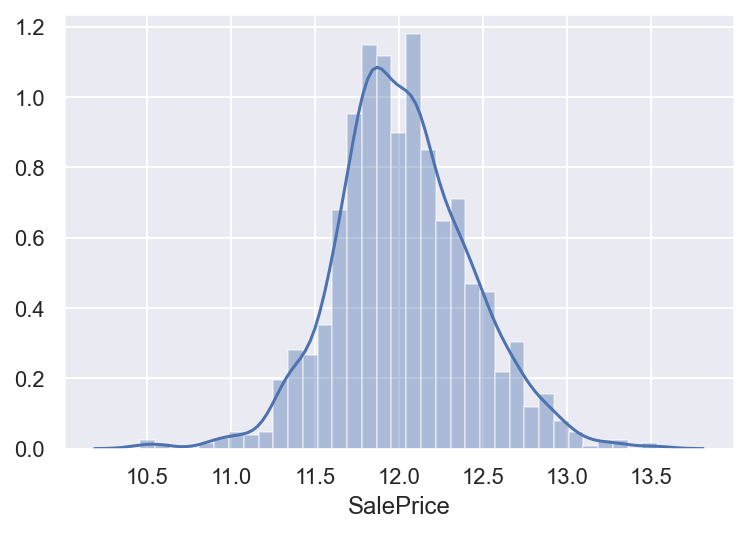

In [327]:
# Transformation of Target Variable

housingdf["SalePrice"] = np.log(housingdf.SalePrice)
sns.distplot(housingdf['SalePrice'])
plt.show()

In [328]:
# Categorical columns

cat_col = housingdf.select_dtypes(include=['object'])
cat_col.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition'],
      dtype='object')

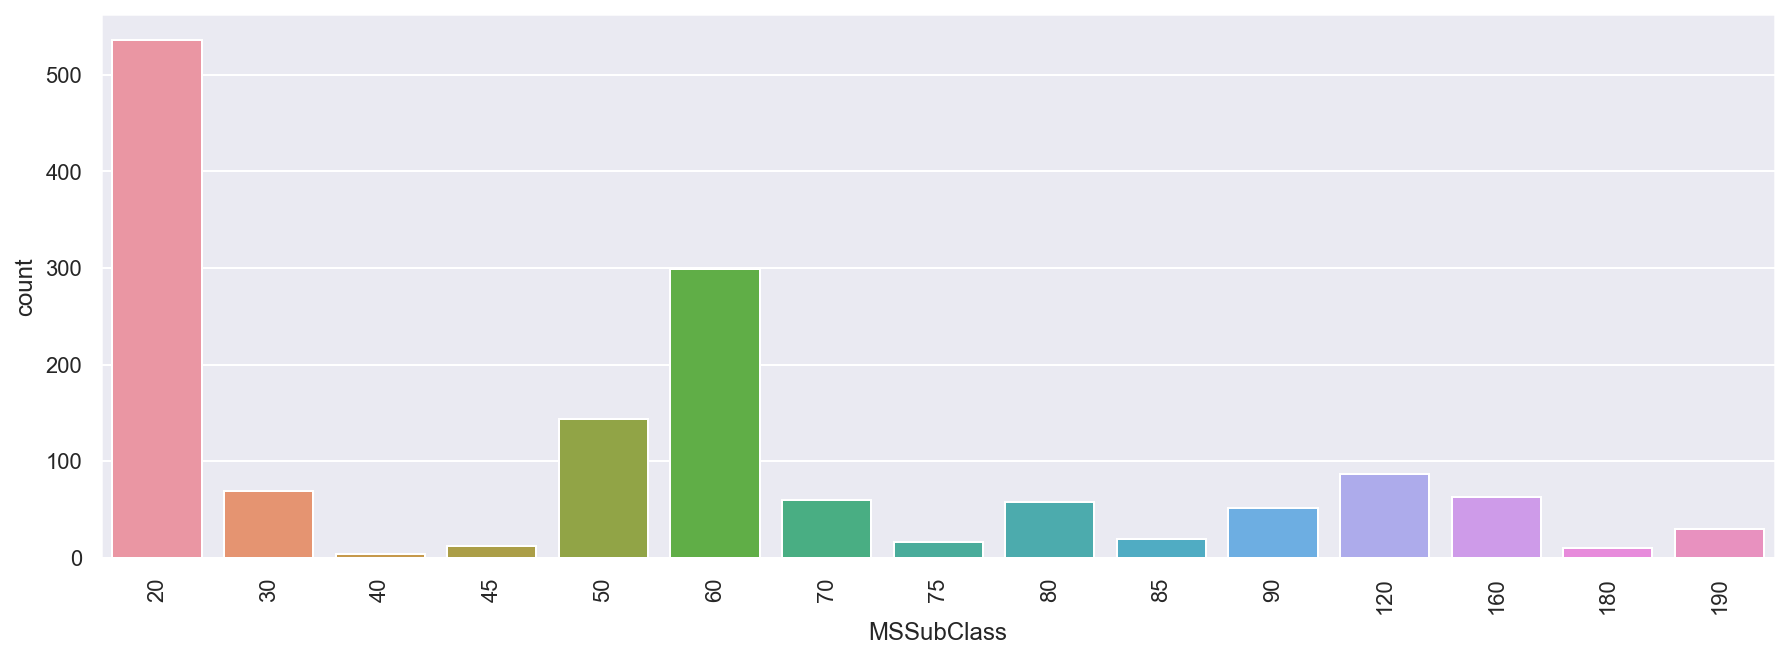

In [329]:
# Countplot of MSSubClass

plt.figure(figsize=(15,5))
sns.countplot(housingdf['MSSubClass'])
plt.xticks(rotation=90)
plt.show()

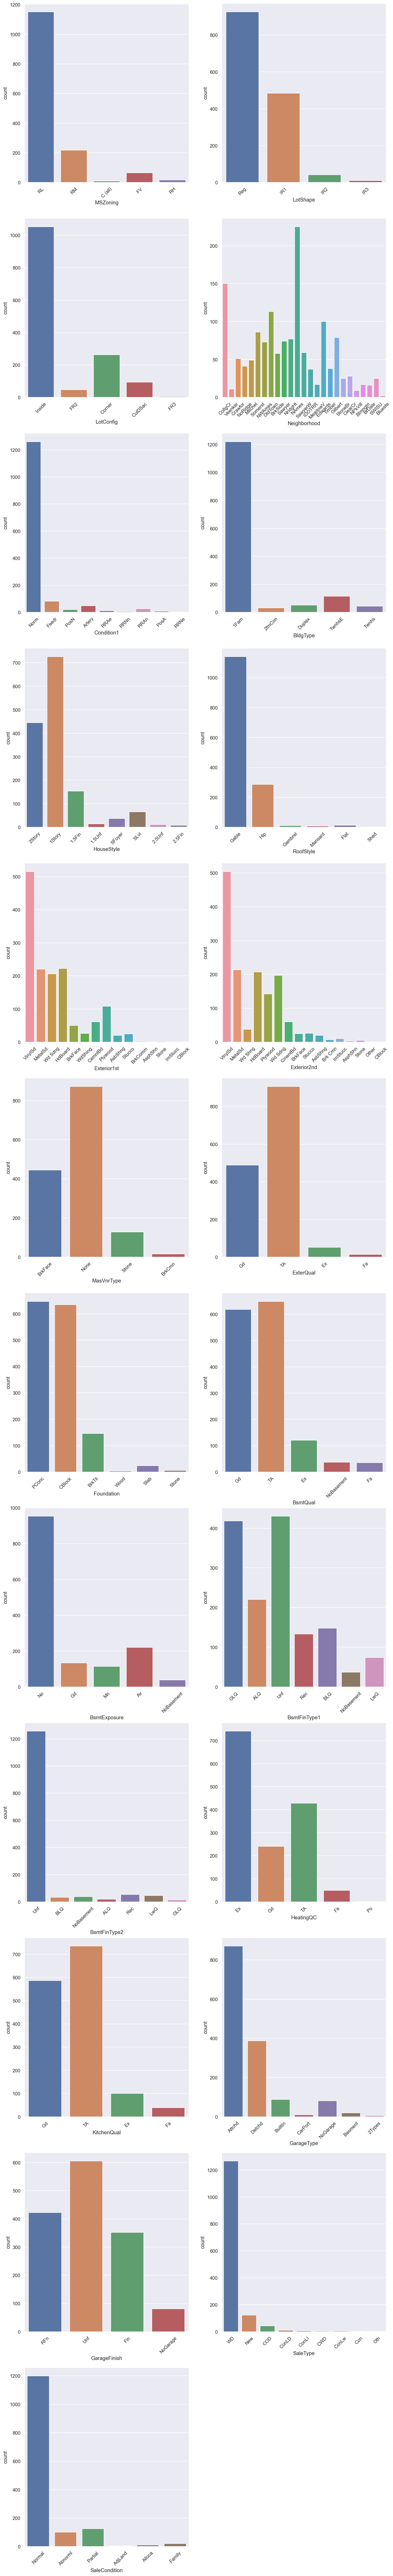

In [330]:
plt.figure(figsize=(15,200))
for i in enumerate((cat_col[1:])):
    plt.subplot(22,2,i[0]+1)
    plt.xticks(rotation=45)
    sns.countplot(x=housingdf[i[1]])

In [331]:
housingdf.shape

(1460, 57)

In [332]:
# Creating dummy variables 

dummy_df = pd.get_dummies(housingdf[['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']], drop_first=True)

In [333]:
# Adding dummy variables to original dataframe 

housingdf = pd.concat([housingdf, dummy_df], axis=1)
housingdf.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  Condition1 BldgType HouseStyle  OverallQual  OverallCond RoofStyle  \
0       Norm     1Fam     2Story            7            5     Gable   
1      Feedr     1Fam     1Story            6            8     Gable   
2       Norm     1Fam     2Story            7            5     Gable   
3       Norm     1Fam     2Story            7            5     Gable   
4       Norm     1Fam     2Story            8            5     Gable   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd      PConc   
1     MetalSd     MetalSd       None         0.0        TA     CBlock   
2     VinylSd     VinylSd    BrkFace       162.0        Gd      PConc   
3     Wd Sdng     Wd Shng       None         0.0        TA     BrkTil   
4     VinylSd     VinylSd    BrkFace       350.0        Gd      PConc   

  BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       Gd           No          GLQ         706          Unf           0   
1       Gd           Gd          ALQ         978          Unf           0   
2       Gd           Mn          GLQ         486          Unf           0   
3       TA           No          ALQ         216          Unf           0   
4       Gd           Av          GLQ         655          Unf           0   

   BsmtUnfSF HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150        Ex       856       854             0       1710   
1        284        Ex      1262         0             0       1262   
2        434        Ex       920       866             0       1786   
3        540        Gd       961       756             0       1717   
4        490        Ex      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  Fireplaces GarageType GarageFinish  GarageCars  WoodDeckSF  \
0          Gd           0     Attchd          RFn           2           0   
1          TA           1     Attchd          RFn           2         298   
2          Gd           1     Attchd          RFn           2           0   
3          Gd           1     Detchd          Unf           3           0   
4          Gd           1     Attchd          RFn           3         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold SaleType SaleCondition  SalePrice  Ageofhouse  Ageofremodel  \
0       2       WD        Normal  12.247694          18            18   
1       5       WD        Normal  12.109011          45            45   
2       9       WD        Normal  12.317167          20            19   
3       2       WD       Abnorml  11.849398         106      

In [334]:
# Dropping original columns whose dummies are created

housingdf = housingdf.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition'],1)

In [335]:
housingdf.shape

(1460, 182)

### <font color=brown> Model Building </font>

In [336]:
# Putting feature variable to X

X = housingdf.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0        150       856       854             0   
1         978           0        284      1262         0             0   
2         486           0        434       920       866             0   
3         216           0        540       961       756             0   
4         655           0        490      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  \
0             1           0           2           0           61   
1             1           1           2         298            0   
2             1           1           2           0           42   
3             1           1           3           0           35   
4             1           1           3         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0              0          0            0         0        0       2   
1              0          0            0         0        0       5   
2              0          0            0         0        0       9   
3            272          0            0         0        0       2   
4              0          0            0         0        0      12   

   Ageofhouse  Ageofremodel  AgeofGarageblt  AgesinceYrSold  MSZoning_FV  \
0          18            18            18.0              13            0   
1          45            45            45.0              14            0   
2          20            19            20.0              13            0   
3         106            51            23.0              15            0   
4          21            21            21.0              13            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0             1                  0              0              0   
1             1                  0              1              0   
2             0                  0              0              0   
3             0                  0              0              0   
4             0                  0              1              0   

   LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0                 1                     0                    0   
1                 0                     0                    0   
2                 1                     0                    0   
3                 0                     0                    0   
4                 0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0

In [337]:
# Putting response variable to y

y = housingdf['SalePrice']

y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [338]:
# Splitting the data into 70% train set and 30% test set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Rescaling the Features

In [339]:
# Scaling the train dataset using RobustScaler

from sklearn.preprocessing import RobustScaler         # importing scaling library

scaler=RobustScaler()                                  # creating an object

cols_scale=X.select_dtypes(['float64','int64']).columns  # Find the columns needs scaling

X[cols_scale]=scaler.fit_transform(X[cols_scale])        # Now scaling


In [340]:
# Importing necessary libraries

from sklearn.linear_model import Ridge   
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor


### <font color=brown> Ridge Regression </font>

In [341]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

# Creating new dataframe for cv results

ridge_cv_results=pd.DataFrame(model_cv.cv_results_)
ridge_cv_results.head()

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.009134      0.005925         0.001217        0.001490      0.0001   
1       0.006250      0.007654         0.003125        0.006250       0.001   
2       0.006249      0.007654         0.003121        0.006243        0.01   
3       0.010679      0.007428         0.001627        0.001365        0.05   
4       0.005326      0.005717         0.001000        0.001265         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.104926          -0.099154          -0.107593   
1   {'alpha': 0.001}          -0.104919          -0.099154          -0.107588   
2    {'alpha': 0.01}          -0.104851          -0.099147          -0.107538   
3    {'alpha': 0.05}          -0.104551          -0.099085          -0.107361   
4     {'alpha': 0.1}          -0.104190          -0.098988          -0.107186   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.090436          -0.103341        -0.101090        0.005989   
1          -0.090408          -0.103319        -0.101078        0.005995   
2          -0.090131          -0.103106        -0.100955        0.006059   
3          -0.089109          -0.102281        -0.100478        0.006299   
4          -0.088123          -0.101440        -0.099985        0.006532   

   rank_test_score  split0_train_score  split1_train_score  \
0               27           -0.077448           -0.067383   
1               26           -0.077448           -0.067384   
2               25           -0.077448           -0.067393   
3               24           -0.077452           -0.067431   
4               23           -0.077461           -0.067481   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.071834           -0.080598           -0.077795   
1           -0.071833           -0.080598           -0.077796   
2           -0.071816           -0.080601           -0.077801   
3           -0.071765           -0.080629           -0.077827   
4           -0.071735           -0.080685           -0.077875   

   mean_train_score  std_train_score  
0         -0.075012         0.004758  
1         -0.075012         0.004758  
2         -0.075012         0.004759  
3         -0.075021         0.004763  
4         -0.075047         0.004771

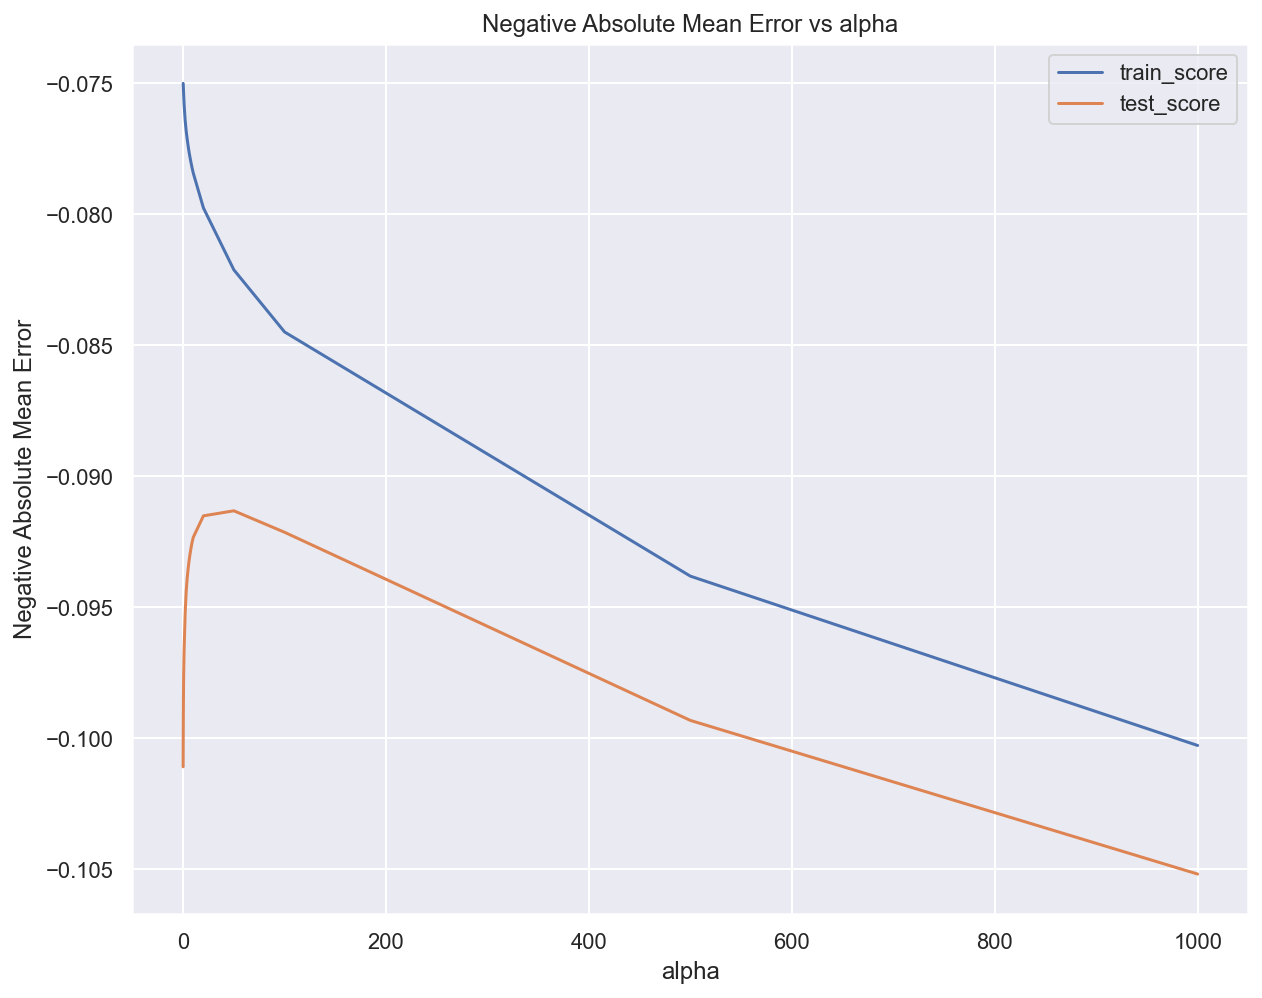

In [342]:
# Setting graph style

sns.set_style('darkgrid')

# Setting figure size

plt.figure(figsize=(10,8))

# Plotting the Ridge with cv rsults with train score and test score

plt.plot(ridge_cv_results['param_alpha'],ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'],ridge_cv_results['mean_test_score'])

# Setting x- label and y- label

plt.xlabel('alpha')
plt.ylabel('Negative Absolute Mean Error')

# Setting the title

plt.title('Negative Absolute Mean Error vs alpha')

# Setting the legend

plt.legend(['train_score','test_score'],loc='upper right')
plt.show()

In [343]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 50}


In [344]:
#Fitting Ridge model for alpha = 3 and printing coefficients which have been penalised
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-6.51511783e-04 -3.95298703e-04  1.85086544e-06  6.67693603e-02
  4.25481708e-02 -2.06374266e-06  3.57612913e-05  6.88089599e-05
  3.58603270e-05  6.74328485e-05  7.51082471e-05  2.50882247e-05
  1.67629326e-04  4.69424741e-02  4.65834103e-03  1.98185502e-02
  1.56441820e-02  1.69133789e-02 -1.17533957e-02  3.61566272e-02
  5.77429706e-02  1.18972427e-04 -5.19405538e-05  1.73547924e-04
  2.66248239e-04  2.63960838e-04 -6.52493926e-04 -6.23130904e-06
 -8.82692684e-04 -2.12253687e-03 -1.24242892e-03  1.10286696e-04
  7.16718038e-03  2.39818202e-02  6.54597644e-03  3.48284635e-02
 -2.28025125e-02  1.07910046e-02 -2.05392002e-02  1.05589325e-03
  2.13944276e-02 -1.18339892e-02 -1.45443584e-03 -1.67644814e-03
 -8.58735759e-04 -9.36442246e-03  1.42450296e-02  2.15803846e-02
 -1.45651946e-02  5.19343552e-02 -5.14751413e-02 -1.81063659e-02
 -3.15788415e-02 -1.18250855e-02 -9.92274691e-03 -3.26686628e-03
 -2.22664517e-03 -6.13070749e-03  1.69149736e-02  4.61353114e-02
 -1.31054734e-02  4.24952

In [345]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8994573419104811
0.8788403107614264
16.136316643528193
8.731805670985825
0.015804423744885596
0.019935629385812385


In [346]:
# Finding Model coefficients 
model_param_ridge = list(ridge.coef_)
model_param_ridge.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_param_ridge)))
ridge_coef.columns = ['Featuere','Coef']

In [347]:
# View top 10 features that contribute positively for model creation 
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere       Coef
0             MSSubClass  10.784707
4            OverallCond   0.066769
21            WoodDeckSF   0.057743
50  Neighborhood_Edwards   0.051934
14          BsmtHalfBath   0.046942
60  Neighborhood_OldTown   0.046135
70       Condition1_PosA   0.042820
5             MasVnrArea   0.042548
20            GarageCars   0.036157
65  Neighborhood_StoneBr   0.036032

In [348]:
# View bottom 10 features that contribute negatively for model creation 
ridge_coef.sort_values(by='Coef',ascending=False).tail(10)

Featuere      Coef
52    Neighborhood_IDOTRR -0.018106
168          SaleType_CWD -0.018287
85      HouseStyle_SFoyer -0.020256
39           LotShape_Reg -0.020539
37           LotShape_IR2 -0.022803
79        BldgType_TwnhsE -0.025276
134   BsmtQual_NoBasement -0.025785
146      BsmtFinType2_BLQ -0.031074
53   Neighborhood_MeadowV -0.031579
51   Neighborhood_Gilbert -0.051475

### <font color=brown> Lasso Regression </font> 

In [349]:
from sklearn.linear_model import Lasso

In [350]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [351]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [352]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [353]:

lasso.coef_

array([-6.02338775e-04, -5.00158042e-04,  1.73240679e-06,  6.71826995e-02,
        4.51892016e-02, -7.72613975e-06,  3.63826520e-05,  7.40328065e-05,
        4.89722012e-05,  2.00724689e-04,  2.25198100e-04,  1.82135759e-04,
        2.75900989e-05,  5.86718875e-02,  0.00000000e+00,  1.27082687e-02,
        1.12272191e-02,  1.40549316e-02, -1.35506980e-03,  3.31252534e-02,
        6.32034061e-02,  1.22025090e-04, -3.24122206e-05,  1.86820671e-04,
        2.59086119e-04,  2.69785615e-04, -5.86849581e-04, -5.42797543e-06,
       -1.15359190e-03, -2.24396665e-03, -1.16282669e-03,  4.81563429e-05,
        6.57610795e-03,  5.32082799e-03,  0.00000000e+00,  6.06635113e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        2.40556136e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  6.12436155e-03,  3.35899977e-02,
       -0.00000000e+00,  1.12778658e-01, -6.87729617e-02, -0.00000000e+00,
       -4.52870413e-02, -

In [354]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9008323413985626
0.8782785024560456
15.915639892525473
8.772294392752617
0.015588285888859426
0.020028069389846158


In [355]:
# Finding Model coefficients 
model_param_lasso = list(lasso.coef_)
model_param_lasso.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param_lasso)))
lasso_coef.columns = ['Featuere','Coef']

In [356]:
# View top 10 features that contribute positively for model creation 
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere       Coef
0             MSSubClass  10.685822
50  Neighborhood_Edwards   0.112779
65  Neighborhood_StoneBr   0.109451
60  Neighborhood_OldTown   0.099988
4            OverallCond   0.067183
21            WoodDeckSF   0.063203
36           MSZoning_RM   0.060664
70       Condition1_PosA   0.058691
14          BsmtHalfBath   0.058672
95    Exterior1st_CBlock   0.053562

In [357]:
# View bottom 10 features that contribute negatively for model creation 
lasso_coef.sort_values(by='Coef',ascending=False).tail(10)

Featuere      Coef
145         BsmtFinType1_Unf -0.003675
139  BsmtExposure_NoBasement -0.011309
156           KitchenQual_Fa -0.012825
134      BsmtQual_NoBasement -0.018639
168             SaleType_CWD -0.020405
85         HouseStyle_SFoyer -0.023881
146         BsmtFinType2_BLQ -0.038909
53      Neighborhood_MeadowV -0.045287
79           BldgType_TwnhsE -0.051798
51      Neighborhood_Gilbert -0.068773

## <font color=brown> Conclusion </font>

#### After all the Analysis, Ridge and Lasso regression was used for finding the R2 score -

#### 1) Ridge regression -
* R2 score on Train dataset by Ridge resression is 0.899 ~ 0.90
* R2 score by Test dataset Ridge resression is 0.878 ~ 0.88

#### 2) Lasso regression -
* R2 score on Train dataset by Lasso resression is 0.90
* R2 score by Test dataset Lasso resression is 0.878 ~ 0.88

#### It was found Ridge and Lasso regression prediction is 88% accurate on Test datasets

### Top 10 Features that contribute Positively for Model Creation according to Rdige are:

### Top 10 Features that contribute Positively for Model Creation according to Lasso are: